In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
# remove every fixation that has position x or y lower than 0
FixData=FixData[FixData['fix_x']>0]
FixData=FixData[FixData['fix_y']>0]
print(np.shape(FixData))

(257808, 12)


In [5]:
# check distinct groups
print(FixData['Group'].unique())

[ 4.  1.  3.  2. nan]


In [6]:
# Remove Group = NaN
FixData=FixData[~FixData['Group'].isna()]

In [7]:
# check distinct groups
print(FixData['Group'].unique())

[4. 1. 3. 2.]


dataset size:  (248845, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 193 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  193 observers and  36  stimuli.
Mean fixation number:  36.74  +/-  9.75
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  6790
Mean X location:  478.4  +/-  93.0  pixels
Mean Y location:  466.1  +/-  65.1  pixels
Mean saccade  amplitude:  78.1  +/-  17.6  pixels
Mean scanpath  length:  2417.5  +/-  521.5  pixels
Data for  193 observ

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21927', '21930', '21939',
        '21946', '22018', '22036', '22108', '22109', '22127', '22129',
        '22138', '22149', '22168', '22174', '22180', '22181', '22186',
        '22204', '22214', '22219', '22228', '22234', '22239', '22242',
        '22261', '22271', '22279', '22291', '22322', '22324', '22327',
        '22341', '22346', '22376', '22378', '22383', '22388', '22394',
        '22410', '22411', '

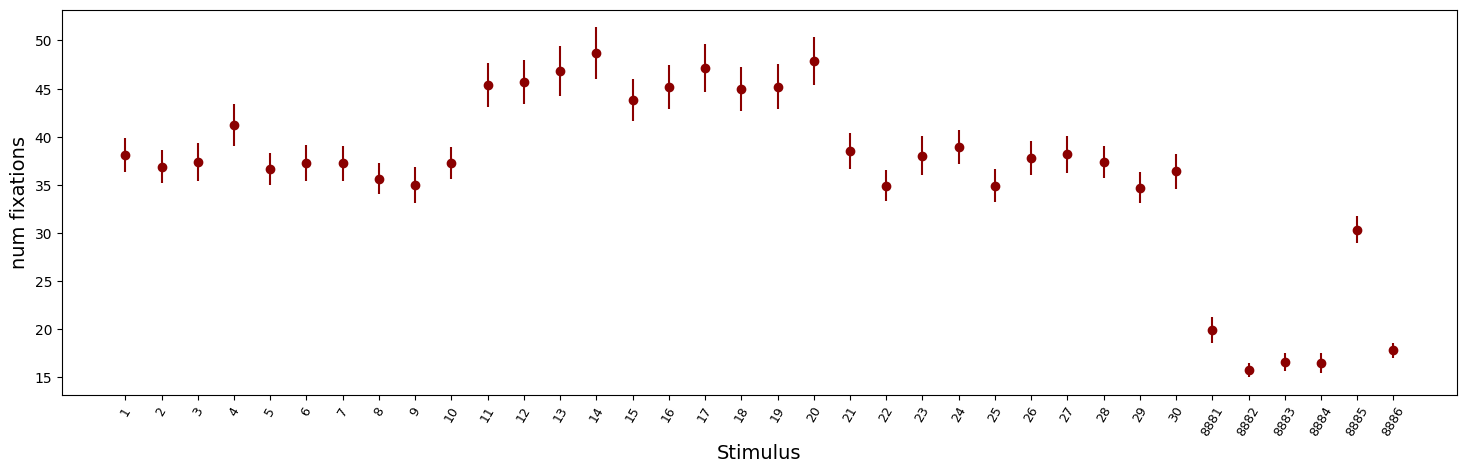

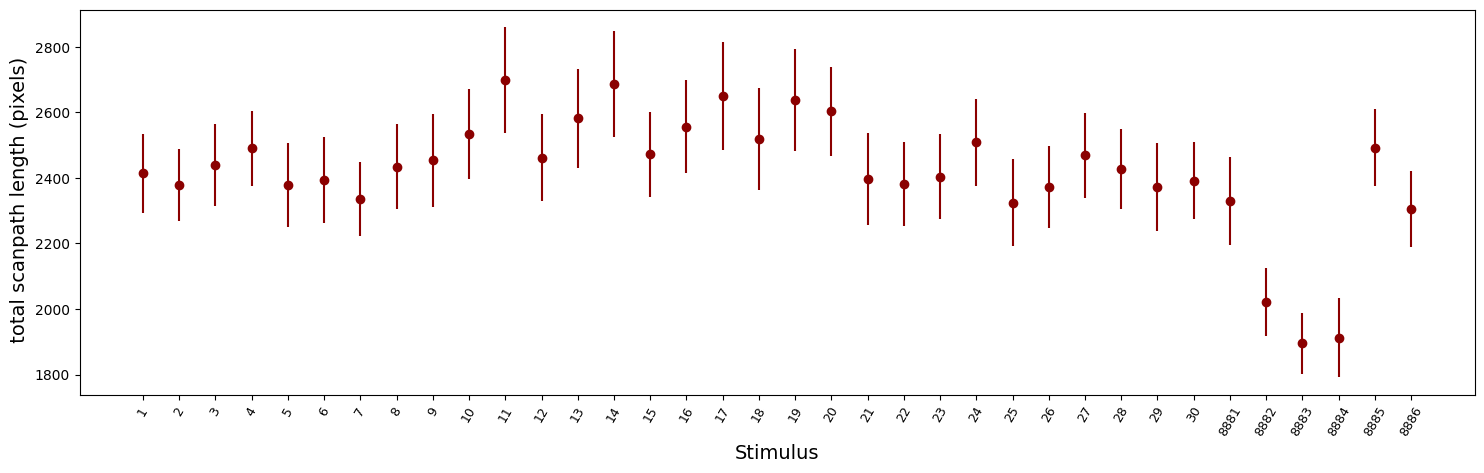

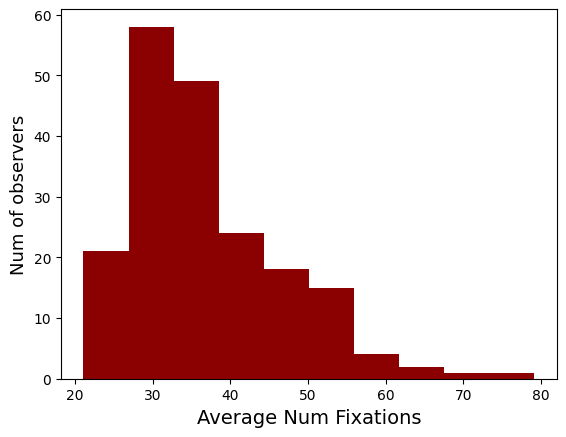

In [9]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [10]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

4 Stimuli with complete data: [7, 8, 32, 33]
32 Stimuli with Missing data: {0: 1, 1: 3, 2: 2, 3: 1, 4: 4, 5: 3, 6: 4, 9: 6, 10: 6, 11: 6, 12: 2, 13: 2, 14: 4, 15: 4, 16: 5, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 6, 23: 3, 24: 4, 25: 3, 26: 2, 27: 5, 28: 4, 29: 2, 30: 5, 31: 5, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
52 Subjects with missing data: {173: 1, 124: 1, 156: 1, 177: 1, 157: 1, 118: 1, 169: 1, 192: 1, 154: 1, 163: 1, 190: 1, 139: 1, 143: 1, 178: 1, 117: 1, 121: 1, 133: 1, 144: 1, 127: 1, 136: 1, 149: 1, 162: 1, 185: 1, 167: 1, 146: 1, 150: 1, 165: 1, 191: 1, 151: 1, 159: 1, 175: 1, 180: 1, 125: 1, 122: 1, 148: 1, 172: 1, 130: 1, 135: 1, 158: 1, 182: 1, 131: 1, 160: 1, 138: 1, 161: 1, 189: 1, 119: 1, 120: 1, 123: 1, 134: 1, 142: 1, 155: 1, 174: 1}


In [11]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

24 Subjects with missing data for the first 10 stimuli
33 Subjects with missing data for the stimuli from 11 to 20 stimuli
31 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [34]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [1. 2. 3. 4.]


In [35]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1, 2,
       3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2, 4,
       2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2, 4,
       1, 1, 3, 3, 1, 1, 4, 4, 2, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4, 4, 4, 4,
       4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2, 1, 3, 1,
       3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 4, 1, 4, 1, 4, 4, 4,
       4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3, 3, 2, 4, 4,
       4, 4, 1, 3, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4, 4])

In [36]:
WhichC = np.array(WhichC, dtype=float)
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0, 1,
       2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1, 3,
       1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1, 3,
       0, 0, 2, 2, 0, 0, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3, 3, 3, 3,
       3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3,
       3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 3, 0, 2, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3, 3])

In [15]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960
0 1 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.28 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.39 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.38 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.41 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.28 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.28 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.27 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum ent

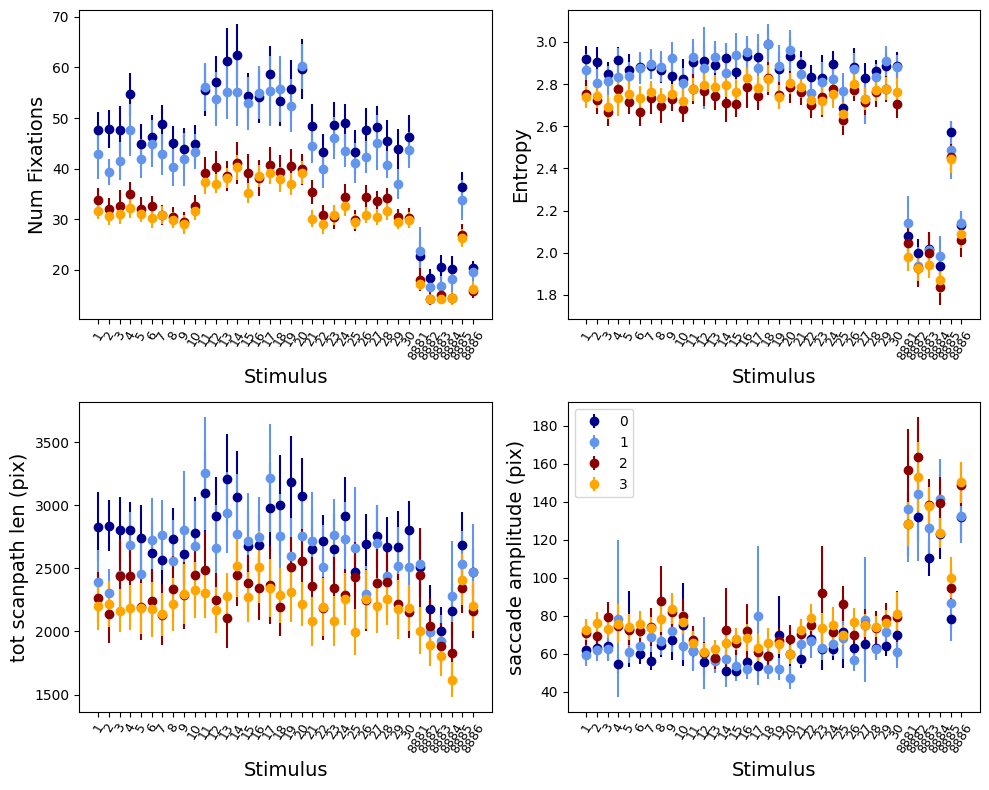

In [16]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [17]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [1. 2. 3. 4.]


In [18]:
WhichC = np.array(WhichC, dtype=float)
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [51]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [20]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  112
0 0 Num fix=  31.02 +/- 4.9
0 0 max num fix=  51.26
0 0 min num fix=  21.08
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2225.9 +/- 471.18 pix
0 0 saccade amplitude =  82.49 +/- 18.44 pix

1 1 num participants:  81
1 1 Num fix=  44.64 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.03
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2682.33 +/- 469.18 pix
1 1 saccade amplitude =  72.08 +/- 14.29 pix



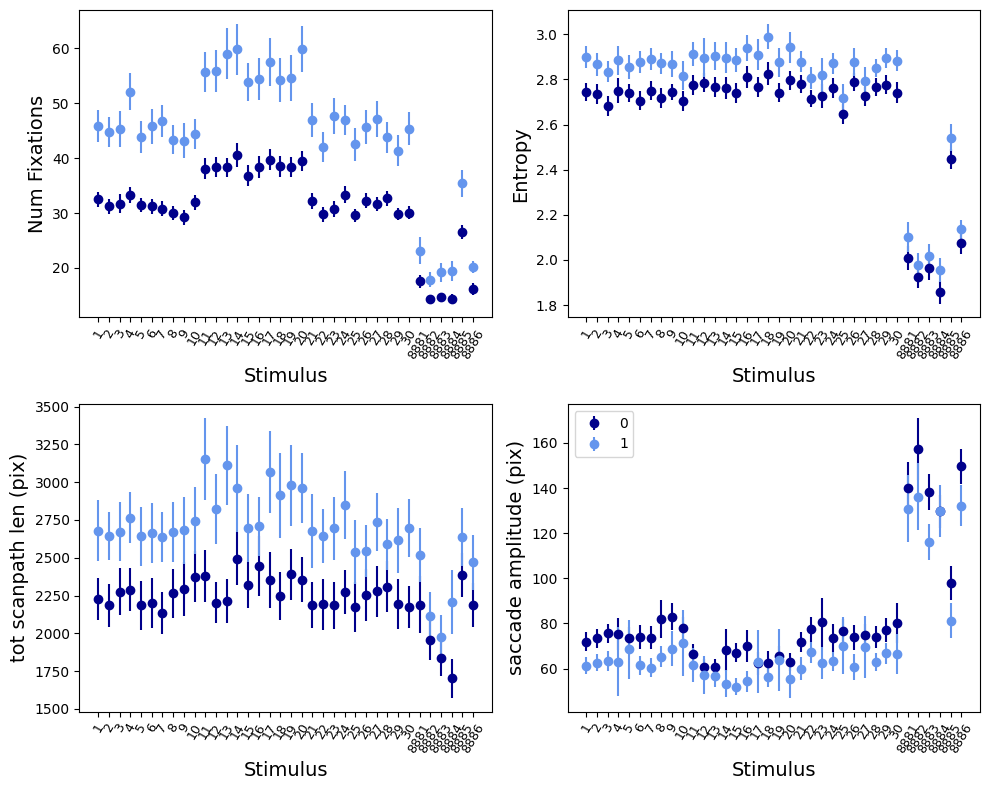

In [21]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [31]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [32]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [14]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [12]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [67]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.114319960071477
---------------------------------------------------------
Group 1
Angle Entropy: 7.396763654882683
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.559467845302823, p: 0.11888775137063351
 


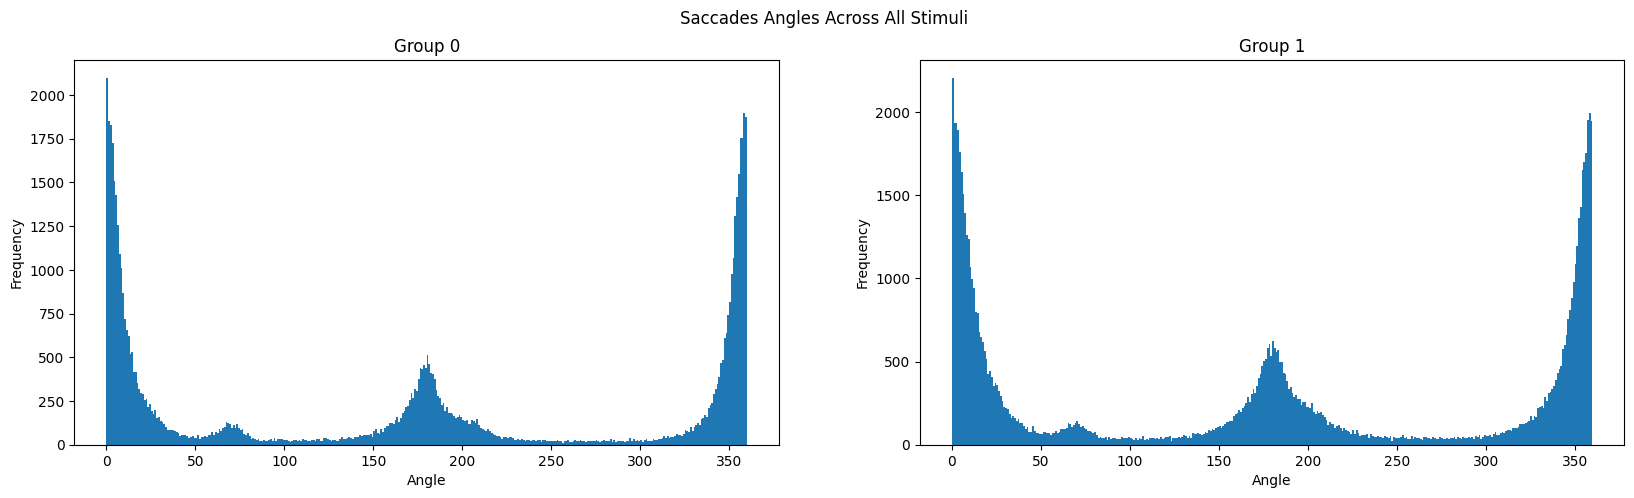

In [52]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [22]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [23]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [24]:
list(set_subj)

[130,
 131,
 133,
 134,
 135,
 136,
 138,
 139,
 142,
 143,
 144,
 146,
 148,
 149,
 150,
 151,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 165,
 167,
 169,
 172,
 173,
 174,
 175,
 177,
 178,
 180,
 182,
 185,
 189,
 190,
 191,
 192,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127]

In [39]:
x = DyslexiaDat.subjects

In [46]:
x

array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
       '21498', '21513', '21522', '21526', '21531', '21568', '21629',
       '21630', '21636', '21641', '21653', '21658', '21667', '21680',
       '21683', '21685', '21699', '21706', '21735', '21774', '21811',
       '21819', '21820', '21862', '21878', '21927', '21930', '21939',
       '21946', '22018', '22036', '22108', '22109', '22127', '22129',
       '22138', '22149', '22168', '22174', '22180', '22181', '22186',
       '22204', '22214', '22219', '22228', '22234', '22239', '22242',
       '22261', '22271', '22279', '22291', '22322', '22324', '22327',
       '22341', '22346', '22376', '22378', '22383', '22388', '22394',
       '22410', '22411', '22420', '22461', '22464', '22468', '22472',
       '22497', '22508', '22518', '22539', '22551', '22552', '22557',
       '22565', '22586', '22618', '22622', '22640', '22655', '22667',
       '22691', '22692', '22705', '22711', '22712', '22729', '22782',
       '22783', '228

In [ ]:
# Get indexes of Graz subjects (Containing 'P' in the subject ID)
GrazSubs_Idx = [i for i, subj in enumerate(x) if 'P' in subj]

In [44]:
GrazSubs_Idx

[114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192]

In [25]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [26]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [27]:
stimuli = list(range(0, 30))

In [28]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\nickp\AppData\Local\Temp\ipykernel_3460\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
 

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [29]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [30]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=10)

In [31]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [32]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [52]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(5):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=10, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=10, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [53]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

5
30
71
8


In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [56]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [57]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(5):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original and Similarity (Avg and Std)

In [58]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [59]:
import re


torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6524060368537903
Epoch 5 loss: 0.5454599857330322
Epoch 10 loss: 0.47338926792144775
Epoch 15 loss: 0.41808614134788513
Epoch 0 loss: 0.6458519697189331
Epoch 5 loss: 0.42822831869125366
Epoch 10 loss: 0.40999725461006165
Epoch 15 loss: 0.3568756580352783
Epoch 0 loss: 0.7053329348564148
Epoch 5 loss: 0.5348095297813416
Epoch 10 loss: 0.455876886844635
Epoch 15 loss: 0.39229515194892883
Epoch 0 loss: 0.6763618588447571
Epoch 5 loss: 0.5652418732643127
Epoch 10 loss: 0.44312554597854614
Epoch 15 loss: 0.4366499185562134
Epoch 0 loss: 0.7705662846565247
Epoch 5 loss: 0.5875271558761597
Epoch 10 loss: 0.4662264883518219
Epoch 15 loss: 0.39350688457489014
Average accuracy: 0.8
Standard deviation: 0.1695582495781317
Total confusion matrix:
[[25.  5.]
 [ 3.  7.]]
False positives: 5.0
False negatives: 3.0
Using device: cuda
Epoch 0 loss: 0.6524060368537903
Epoch 5 loss: 0.5549365878105164
Epoch 10 loss: 0.5195873975753784
Epoch 15 loss: 0.46369993686676025
E

Approximation Error: 0.000199104193598032 (< 0.05 is good)

FEATURE ANALYSIS


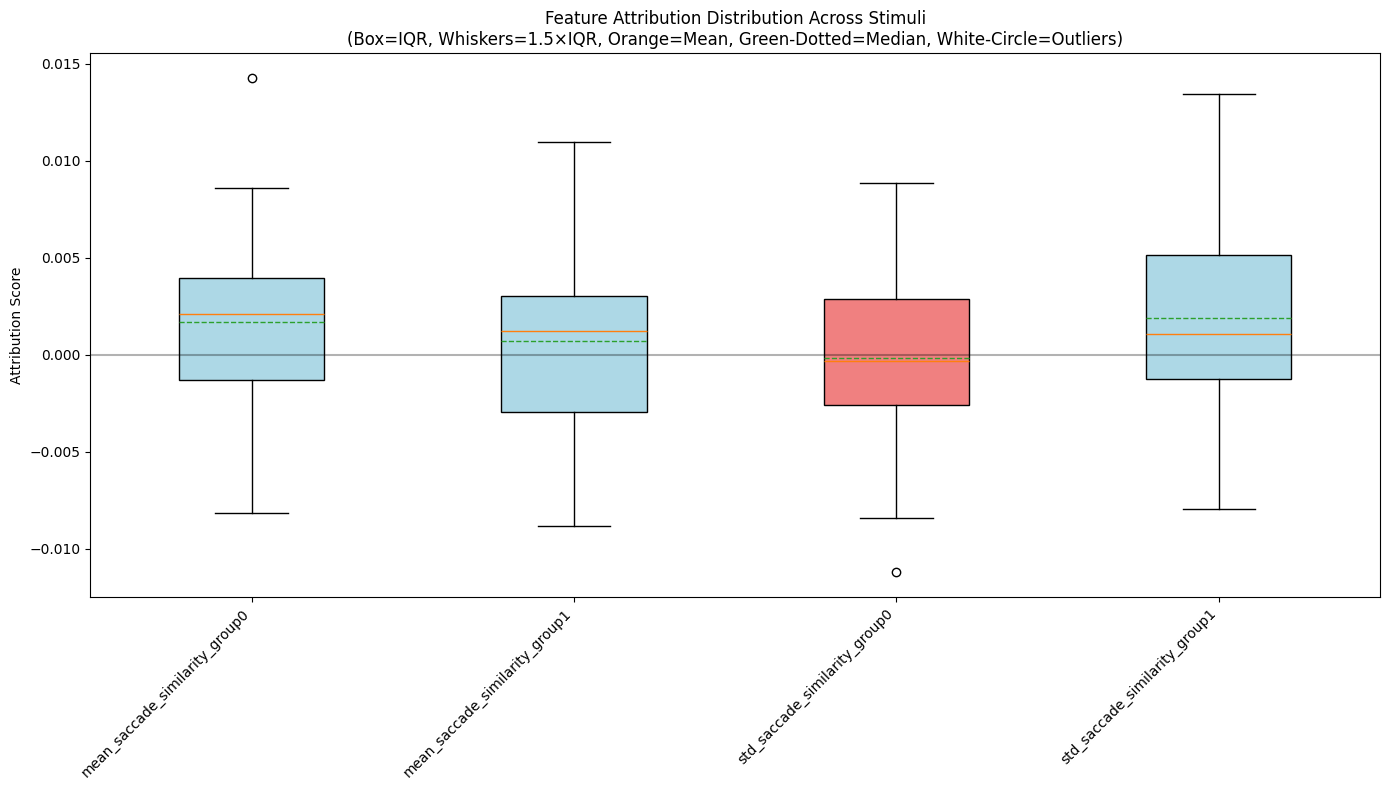


Feature Attribution Summary:
------------------------------------------------------------
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0047, Min=-0.0081, Max= 0.0143
mean_saccade_similarity_group1: Mean= 0.0007, Std= 0.0051, Min=-0.0088, Max= 0.0110
std_saccade_similarity_group0 : Mean=-0.0002, Std= 0.0043, Min=-0.0112, Max= 0.0088
std_saccade_similarity_group1 : Mean= 0.0019, Std= 0.0048, Min=-0.0079, Max= 0.0134


In [60]:
feature_names = [
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [61]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [62]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [63]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7369756698608398
Epoch 5 loss: 0.3666556179523468
Epoch 10 loss: 0.3303701877593994
Epoch 15 loss: 0.3283473253250122
Epoch 0 loss: 0.67606121301651
Epoch 5 loss: 0.36846426129341125
Epoch 10 loss: 0.33538079261779785
Epoch 15 loss: 0.3286733031272888
Epoch 0 loss: 0.7513264417648315
Epoch 5 loss: 0.365287184715271
Epoch 10 loss: 0.33331844210624695
Epoch 15 loss: 0.33217254281044006
Epoch 0 loss: 0.660934567451477
Epoch 5 loss: 0.40857627987861633
Epoch 10 loss: 0.34316539764404297
Epoch 15 loss: 0.33169132471084595
Epoch 0 loss: 0.7020596265792847
Epoch 5 loss: 0.40237483382225037
Epoch 10 loss: 0.331023633480072
Epoch 15 loss: 0.32855024933815
Average accuracy: 0.875
Standard deviation: 0.15811388300841897
Total confusion matrix:
[[26.  4.]
 [ 1.  9.]]
False positives: 4.0
False negatives: 1.0


In [64]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7369756698608398
Epoch 5 loss: 0.3794895112514496
Epoch 10 loss: 0.3392281234264374
Epoch 15 loss: 0.34338104724884033
Epoch 0 loss: 0.67606121301651
Epoch 5 loss: 0.39285317063331604
Epoch 10 loss: 0.35558223724365234
Epoch 15 loss: 0.3362601697444916
Epoch 0 loss: 0.7513264417648315
Epoch 5 loss: 0.3841085731983185
Epoch 10 loss: 0.35632601380348206
Epoch 15 loss: 0.34407439827919006
Epoch 0 loss: 0.660934567451477
Epoch 5 loss: 0.44117507338523865
Epoch 10 loss: 0.37461820244789124
Epoch 15 loss: 0.3477906286716461
Epoch 0 loss: 0.7020596265792847
Epoch 5 loss: 0.4354454278945923
Epoch 10 loss: 0.35108742117881775
Epoch 15 loss: 0.3374415934085846
Average accuracy: 0.925
Standard deviation: 0.15
Total confusion matrix:
[[28.  2.]
 [ 1.  9.]]
False positives: 2.0
False negatives: 1.0


Approximation Error: -0.00046000274596735835 (< 0.05 is good)

FEATURE ANALYSIS


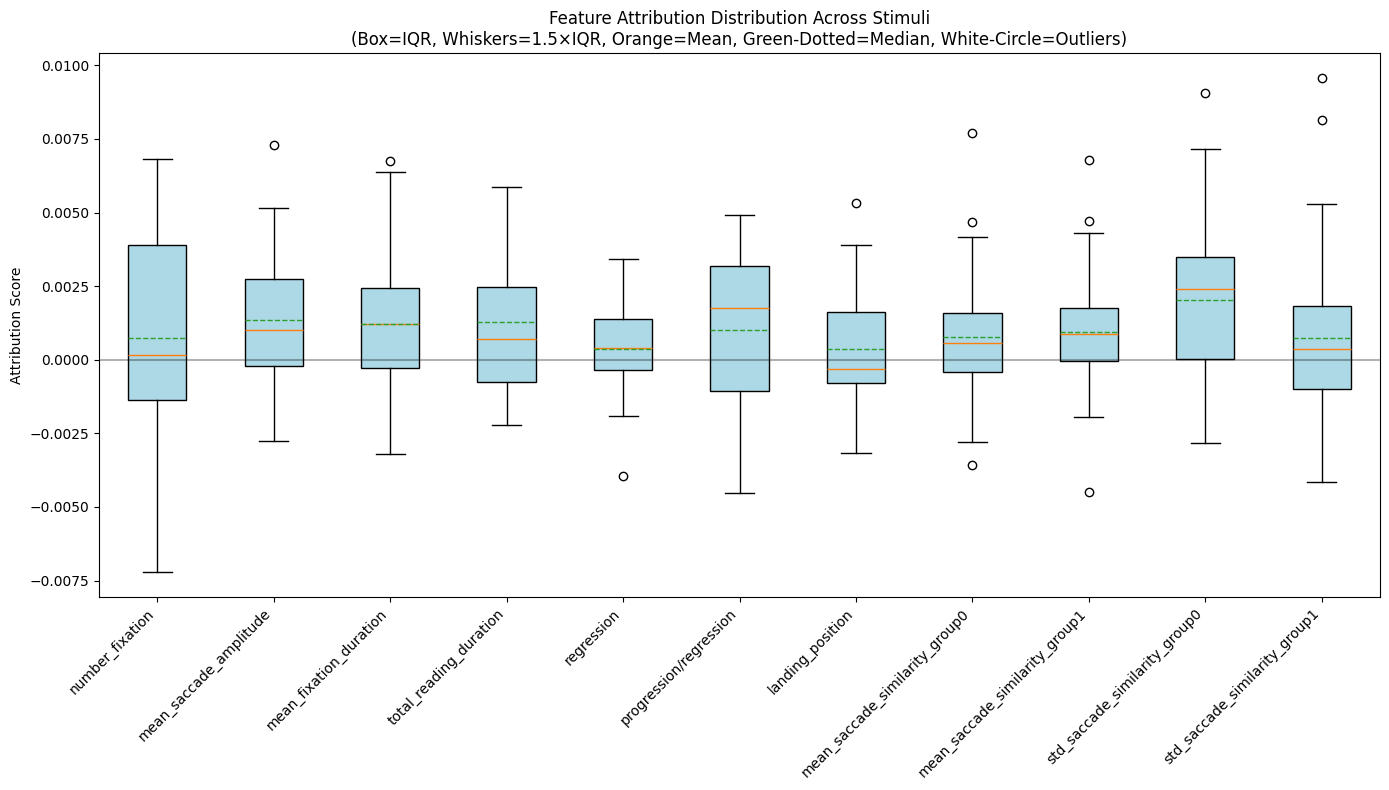


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0007, Std= 0.0037, Min=-0.0072, Max= 0.0068
mean_saccade_amplitude        : Mean= 0.0013, Std= 0.0022, Min=-0.0028, Max= 0.0073
mean_fixation_duration        : Mean= 0.0012, Std= 0.0025, Min=-0.0032, Max= 0.0067
total_reading_duration        : Mean= 0.0013, Std= 0.0024, Min=-0.0022, Max= 0.0059
regression                    : Mean= 0.0004, Std= 0.0015, Min=-0.0040, Max= 0.0034
progression/regression        : Mean= 0.0010, Std= 0.0026, Min=-0.0045, Max= 0.0049
landing_position              : Mean= 0.0004, Std= 0.0020, Min=-0.0032, Max= 0.0053
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0023, Min=-0.0036, Max= 0.0077
mean_saccade_similarity_group1: Mean= 0.0009, Std= 0.0021, Min=-0.0045, Max= 0.0068
std_saccade_similarity_group0 : Mean= 0.0020, Std= 0.0027, Min=-0.0028, Max= 0.0091
std_saccade_similarity_group1 : Mean= 0.0007, Std= 0.0030, Min=-0.004

In [65]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity

In [66]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [67]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7890374660491943
Epoch 5 loss: 0.4708094000816345
Epoch 10 loss: 0.3531169593334198
Epoch 15 loss: 0.33657628297805786
Epoch 0 loss: 0.6607396602630615
Epoch 5 loss: 0.4086073338985443
Epoch 10 loss: 0.34152311086654663
Epoch 15 loss: 0.3297587037086487
Epoch 0 loss: 0.6635951995849609
Epoch 5 loss: 0.41020432114601135
Epoch 10 loss: 0.3515376150608063
Epoch 15 loss: 0.3286270499229431
Epoch 0 loss: 0.8235110640525818
Epoch 5 loss: 0.4550182819366455
Epoch 10 loss: 0.34950658679008484
Epoch 15 loss: 0.33006882667541504
Epoch 0 loss: 0.8486012816429138
Epoch 5 loss: 0.4204251766204834
Epoch 10 loss: 0.35410866141319275
Epoch 15 loss: 0.32932621240615845
Average accuracy: 0.95
Standard deviation: 0.09999999999999999
Total confusion matrix:
[[28.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


In [68]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7890374660491943
Epoch 5 loss: 0.4810327887535095
Epoch 10 loss: 0.38502761721611023
Epoch 15 loss: 0.3523563742637634
Epoch 0 loss: 0.6607396602630615
Epoch 5 loss: 0.4303126037120819
Epoch 10 loss: 0.35910043120384216
Epoch 15 loss: 0.3434739410877228
Epoch 0 loss: 0.6635951995849609
Epoch 5 loss: 0.44903868436813354
Epoch 10 loss: 0.3823873698711395
Epoch 15 loss: 0.33887672424316406
Epoch 0 loss: 0.8235110640525818
Epoch 5 loss: 0.49067893624305725
Epoch 10 loss: 0.3792785406112671
Epoch 15 loss: 0.3526577353477478
Epoch 0 loss: 0.8486012816429138
Epoch 5 loss: 0.4484018385410309
Epoch 10 loss: 0.37403565645217896
Epoch 15 loss: 0.3333812355995178
Average accuracy: 0.95
Standard deviation: 0.09999999999999999
Total confusion matrix:
[[28.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


Approximation Error: -0.0006636831676587462 (< 0.05 is good)

FEATURE ANALYSIS


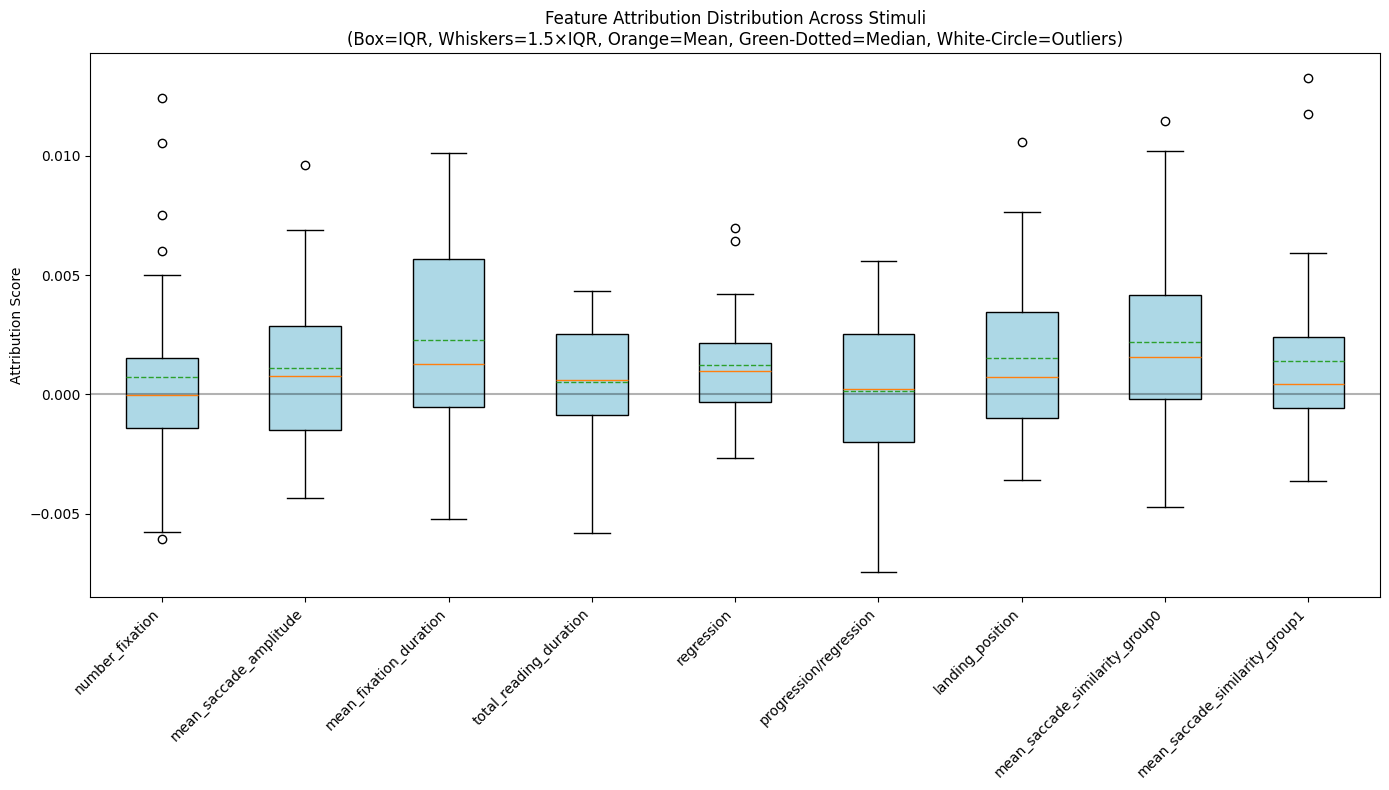


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0007, Std= 0.0041, Min=-0.0061, Max= 0.0124
mean_saccade_amplitude        : Mean= 0.0011, Std= 0.0032, Min=-0.0043, Max= 0.0096
mean_fixation_duration        : Mean= 0.0023, Std= 0.0037, Min=-0.0052, Max= 0.0101
total_reading_duration        : Mean= 0.0005, Std= 0.0023, Min=-0.0058, Max= 0.0043
regression                    : Mean= 0.0012, Std= 0.0022, Min=-0.0027, Max= 0.0070
progression/regression        : Mean= 0.0001, Std= 0.0031, Min=-0.0075, Max= 0.0056
landing_position              : Mean= 0.0015, Std= 0.0034, Min=-0.0036, Max= 0.0106
mean_saccade_similarity_group0: Mean= 0.0022, Std= 0.0035, Min=-0.0047, Max= 0.0115
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0037, Min=-0.0037, Max= 0.0133


In [69]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity (without mean saccade amplitude)

In [70]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [71]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7073447704315186
Epoch 5 loss: 0.441417396068573
Epoch 10 loss: 0.3731539249420166
Epoch 15 loss: 0.34341245889663696
Epoch 0 loss: 0.7606449127197266
Epoch 5 loss: 0.4205385744571686
Epoch 10 loss: 0.3519916832447052
Epoch 15 loss: 0.3304711580276489
Epoch 0 loss: 0.6641826629638672
Epoch 5 loss: 0.4148796498775482
Epoch 10 loss: 0.3427101671695709
Epoch 15 loss: 0.33552831411361694
Epoch 0 loss: 0.7216679453849792
Epoch 5 loss: 0.3922099769115448
Epoch 10 loss: 0.34232228994369507
Epoch 15 loss: 0.32887768745422363
Epoch 0 loss: 0.6837949156761169
Epoch 5 loss: 0.4110063910484314
Epoch 10 loss: 0.3502960801124573
Epoch 15 loss: 0.33099380135536194
Average accuracy: 0.9
Standard deviation: 0.09354143466934853
Total confusion matrix:
[[26.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


In [72]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7073447704315186
Epoch 5 loss: 0.46821755170822144
Epoch 10 loss: 0.3890855312347412
Epoch 15 loss: 0.3579046428203583
Epoch 0 loss: 0.7606449127197266
Epoch 5 loss: 0.4412709176540375
Epoch 10 loss: 0.3818553686141968
Epoch 15 loss: 0.34513887763023376
Epoch 0 loss: 0.6641826629638672
Epoch 5 loss: 0.447198748588562
Epoch 10 loss: 0.3814011514186859
Epoch 15 loss: 0.3501753509044647
Epoch 0 loss: 0.7216679453849792
Epoch 5 loss: 0.4207174479961395
Epoch 10 loss: 0.35306665301322937
Epoch 15 loss: 0.34672117233276367
Epoch 0 loss: 0.6837949156761169
Epoch 5 loss: 0.44663336873054504
Epoch 10 loss: 0.356404185295105
Epoch 15 loss: 0.3488572835922241
Average accuracy: 0.95
Standard deviation: 0.06123724356957946
Total confusion matrix:
[[28.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


Approximation Error: -0.0004205394652672112 (< 0.05 is good)

FEATURE ANALYSIS


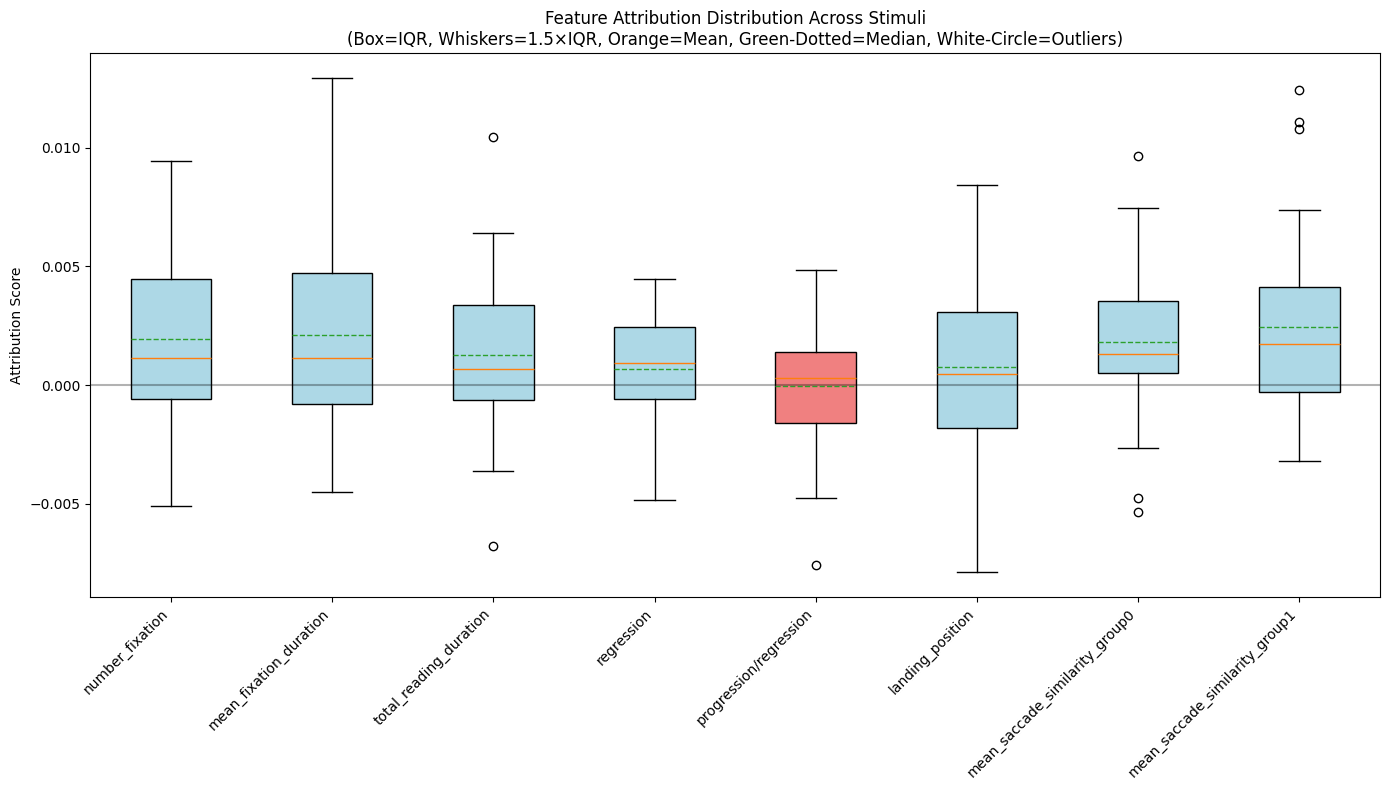


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0037, Min=-0.0051, Max= 0.0095
mean_fixation_duration        : Mean= 0.0021, Std= 0.0044, Min=-0.0045, Max= 0.0129
total_reading_duration        : Mean= 0.0012, Std= 0.0034, Min=-0.0068, Max= 0.0104
regression                    : Mean= 0.0007, Std= 0.0022, Min=-0.0048, Max= 0.0045
progression/regression        : Mean=-0.0001, Std= 0.0025, Min=-0.0076, Max= 0.0048
landing_position              : Mean= 0.0008, Std= 0.0034, Min=-0.0079, Max= 0.0084
mean_saccade_similarity_group0: Mean= 0.0018, Std= 0.0032, Min=-0.0054, Max= 0.0096
mean_saccade_similarity_group1: Mean= 0.0024, Std= 0.0039, Min=-0.0032, Max= 0.0124


In [73]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [74]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [75]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7354977130889893
Epoch 5 loss: 0.4012017548084259
Epoch 10 loss: 0.36039814352989197
Epoch 15 loss: 0.3289242684841156
Epoch 0 loss: 0.8047628402709961
Epoch 5 loss: 0.4080061614513397
Epoch 10 loss: 0.33162474632263184
Epoch 15 loss: 0.3331485688686371
Epoch 0 loss: 0.669610857963562
Epoch 5 loss: 0.39243045449256897
Epoch 10 loss: 0.33161720633506775
Epoch 15 loss: 0.32770001888275146
Epoch 0 loss: 0.6954752206802368
Epoch 5 loss: 0.3931558132171631
Epoch 10 loss: 0.3471749722957611
Epoch 15 loss: 0.3361988365650177
Epoch 0 loss: 0.6579087972640991
Epoch 5 loss: 0.38434627652168274
Epoch 10 loss: 0.33287662267684937
Epoch 15 loss: 0.32977792620658875
Average accuracy: 0.875
Standard deviation: 0.13693063937629152
Total confusion matrix:
[[26.  4.]
 [ 1.  9.]]
False positives: 4.0
False negatives: 1.0


In [76]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7354977130889893
Epoch 5 loss: 0.4314848482608795
Epoch 10 loss: 0.3901748061180115
Epoch 15 loss: 0.34652331471443176
Epoch 0 loss: 0.8047628402709961
Epoch 5 loss: 0.43902525305747986
Epoch 10 loss: 0.35385963320732117
Epoch 15 loss: 0.3459837734699249
Epoch 0 loss: 0.669610857963562
Epoch 5 loss: 0.42165061831474304
Epoch 10 loss: 0.3644863963127136
Epoch 15 loss: 0.3317595422267914
Epoch 0 loss: 0.6954752206802368
Epoch 5 loss: 0.4241851270198822
Epoch 10 loss: 0.3644031584262848
Epoch 15 loss: 0.3480243682861328
Epoch 0 loss: 0.6579087972640991
Epoch 5 loss: 0.4146764576435089
Epoch 10 loss: 0.34536996483802795
Epoch 15 loss: 0.34544506669044495
Average accuracy: 0.875
Standard deviation: 0.19364916731037085
Total confusion matrix:
[[27.  3.]
 [ 2.  8.]]
False positives: 3.0
False negatives: 2.0


Approximation Error: -0.000379536475520581 (< 0.05 is good)

FEATURE ANALYSIS


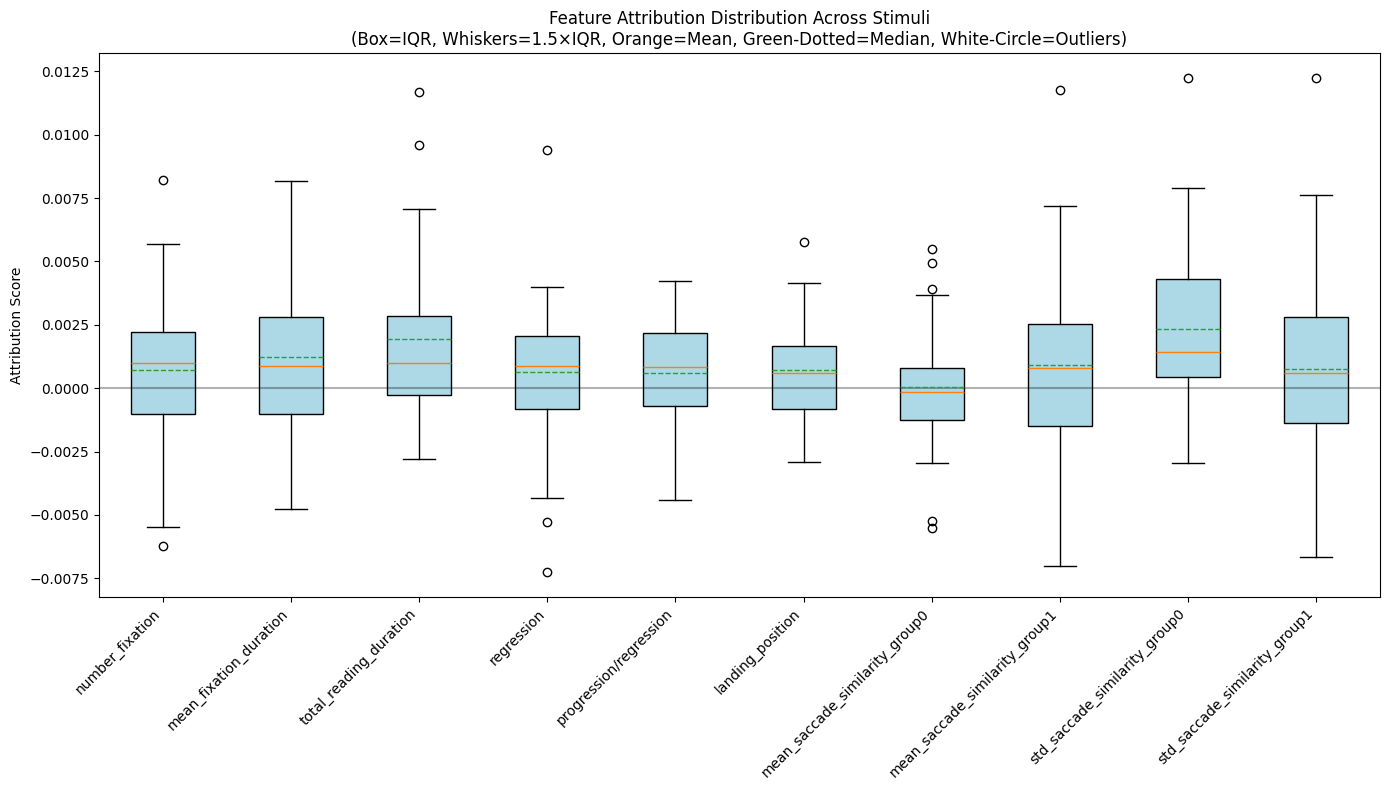


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0007, Std= 0.0032, Min=-0.0062, Max= 0.0082
mean_fixation_duration        : Mean= 0.0012, Std= 0.0029, Min=-0.0048, Max= 0.0082
total_reading_duration        : Mean= 0.0019, Std= 0.0033, Min=-0.0028, Max= 0.0117
regression                    : Mean= 0.0006, Std= 0.0031, Min=-0.0073, Max= 0.0094
progression/regression        : Mean= 0.0006, Std= 0.0022, Min=-0.0044, Max= 0.0042
landing_position              : Mean= 0.0007, Std= 0.0021, Min=-0.0029, Max= 0.0058
mean_saccade_similarity_group0: Mean= 0.0001, Std= 0.0025, Min=-0.0055, Max= 0.0055
mean_saccade_similarity_group1: Mean= 0.0009, Std= 0.0036, Min=-0.0070, Max= 0.0118
std_saccade_similarity_group0 : Mean= 0.0023, Std= 0.0033, Min=-0.0030, Max= 0.0122
std_saccade_similarity_group1 : Mean= 0.0008, Std= 0.0041, Min=-0.0067, Max= 0.0122


In [77]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All

In [78]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [79]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.693169355392456
Epoch 5 loss: 0.3749164044857025
Epoch 10 loss: 0.33425596356391907
Epoch 15 loss: 0.3280036151409149
Epoch 0 loss: 0.6579442024230957
Epoch 5 loss: 0.3646816313266754
Epoch 10 loss: 0.3286985754966736
Epoch 15 loss: 0.32994359731674194
Epoch 0 loss: 0.69173663854599
Epoch 5 loss: 0.3818499743938446
Epoch 10 loss: 0.33899441361427307
Epoch 15 loss: 0.329357773065567
Epoch 0 loss: 0.6527765989303589
Epoch 5 loss: 0.39297911524772644
Epoch 10 loss: 0.33381739258766174
Epoch 15 loss: 0.3284664452075958
Epoch 0 loss: 0.7650325298309326
Epoch 5 loss: 0.3739526867866516
Epoch 10 loss: 0.32956016063690186
Epoch 15 loss: 0.32771995663642883
Average accuracy: 0.9
Standard deviation: 0.09354143466934853
Total confusion matrix:
[[26.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


In [80]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.693169355392456
Epoch 5 loss: 0.3998030126094818
Epoch 10 loss: 0.3589860498905182
Epoch 15 loss: 0.3366587460041046
Epoch 0 loss: 0.6579442024230957
Epoch 5 loss: 0.3869938552379608
Epoch 10 loss: 0.33857548236846924
Epoch 15 loss: 0.35016873478889465
Epoch 0 loss: 0.69173663854599
Epoch 5 loss: 0.41033023595809937
Epoch 10 loss: 0.35037246346473694
Epoch 15 loss: 0.32855647802352905
Epoch 0 loss: 0.6527765989303589
Epoch 5 loss: 0.42715203762054443
Epoch 10 loss: 0.3589642345905304
Epoch 15 loss: 0.3303598165512085
Epoch 0 loss: 0.7650325298309326
Epoch 5 loss: 0.4023679494857788
Epoch 10 loss: 0.345088392496109
Epoch 15 loss: 0.33368533849716187
Average accuracy: 0.925
Standard deviation: 0.06123724356957946
Total confusion matrix:
[[27.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


Approximation Error: 0.0004541538655757904 (< 0.05 is good)

FEATURE ANALYSIS


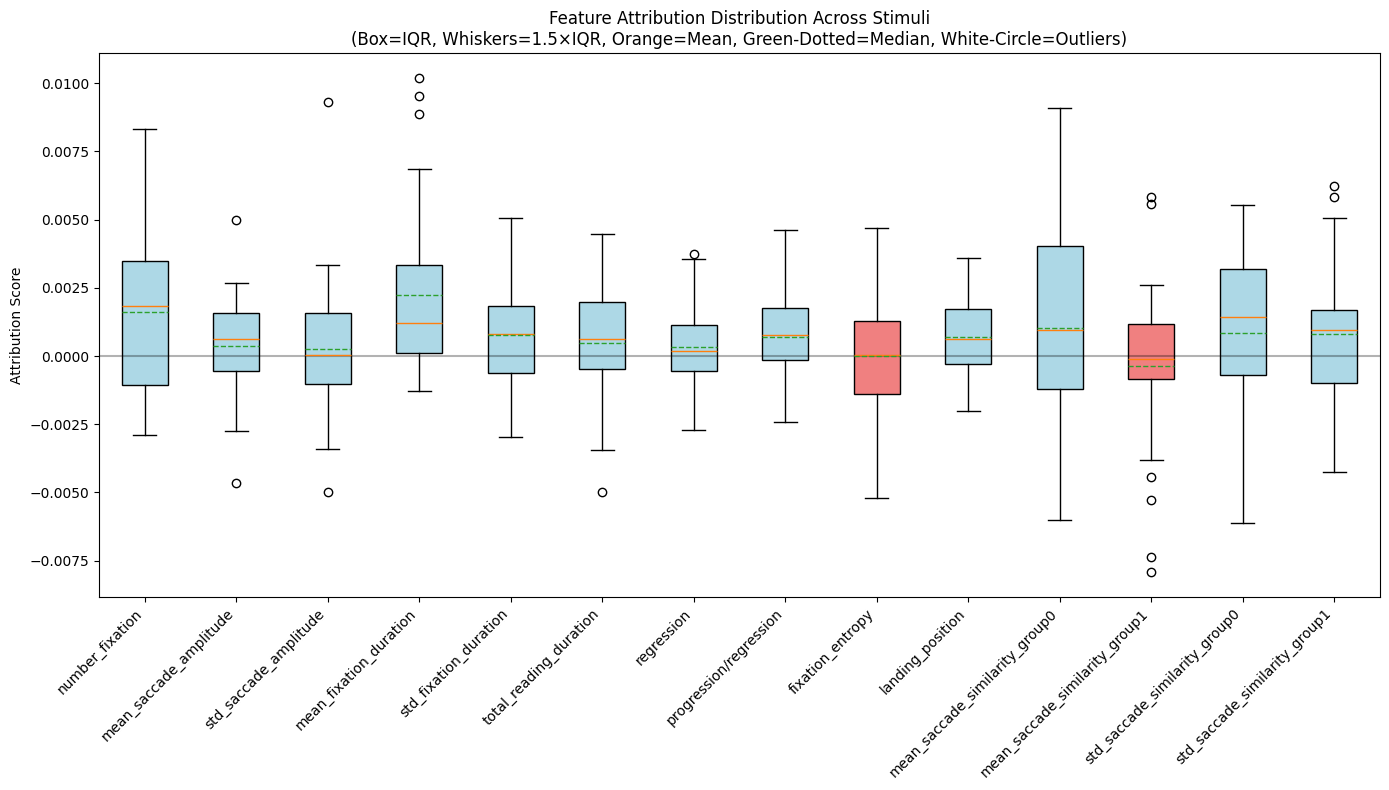


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0029, Min=-0.0029, Max= 0.0083
mean_saccade_amplitude        : Mean= 0.0004, Std= 0.0019, Min=-0.0047, Max= 0.0050
std_saccade_amplitude         : Mean= 0.0002, Std= 0.0026, Min=-0.0050, Max= 0.0093
mean_fixation_duration        : Mean= 0.0022, Std= 0.0032, Min=-0.0013, Max= 0.0102
std_fixation_duration         : Mean= 0.0008, Std= 0.0021, Min=-0.0030, Max= 0.0051
total_reading_duration        : Mean= 0.0005, Std= 0.0022, Min=-0.0050, Max= 0.0045
regression                    : Mean= 0.0003, Std= 0.0017, Min=-0.0027, Max= 0.0037
progression/regression        : Mean= 0.0007, Std= 0.0016, Min=-0.0024, Max= 0.0046
fixation_entropy              : Mean=-0.0000, Std= 0.0021, Min=-0.0052, Max= 0.0047
landing_position              : Mean= 0.0007, Std= 0.0016, Min=-0.0020, Max= 0.0036
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0036, Min=-0.006

In [81]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [82]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [83]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.725273847579956
Epoch 5 loss: 0.4781448543071747
Epoch 10 loss: 0.3662799298763275
Epoch 15 loss: 0.35402175784111023
Epoch 0 loss: 0.7847690582275391
Epoch 5 loss: 0.433234840631485
Epoch 10 loss: 0.3476369380950928
Epoch 15 loss: 0.33770737051963806
Epoch 0 loss: 0.6517851948738098
Epoch 5 loss: 0.43794548511505127
Epoch 10 loss: 0.3549487292766571
Epoch 15 loss: 0.33331528306007385
Epoch 0 loss: 0.71491938829422
Epoch 5 loss: 0.42547607421875
Epoch 10 loss: 0.34654688835144043
Epoch 15 loss: 0.3334428071975708
Epoch 0 loss: 0.6763250827789307
Epoch 5 loss: 0.4617580473423004
Epoch 10 loss: 0.3634628653526306
Epoch 15 loss: 0.3333356976509094
Average accuracy: 0.85
Standard deviation: 0.18371173070873836
Total confusion matrix:
[[26.  4.]
 [ 2.  8.]]
False positives: 4.0
False negatives: 2.0
Using device: cuda
Epoch 0 loss: 0.725273847579956
Epoch 5 loss: 0.4882436990737915
Epoch 10 loss: 0.40799835324287415
Epoch 15 loss: 0.38105514645576477
Epoch 